In [58]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [5]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2)+0.2*torch.randn(x.size())

In [64]:
#完成神经网络图的搭建
class Net(nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = nn.Linear(n_feature,n_hidden)
        self.predict = nn.Linear(n_hidden,1)
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x

In [74]:
net = Net(1,20,1)
print(net)

#optimizer

optimizer = torch.optim.SGD(net.parameters(),lr=0.001)
loss_fun = torch.nn.MSELoss()


plt.figure()
plt.ion()
plt.show()

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)


<Figure size 432x288 with 0 Axes>

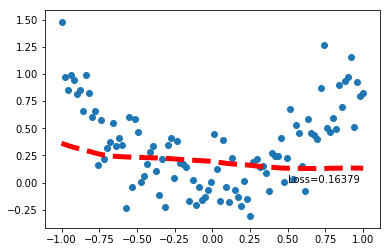

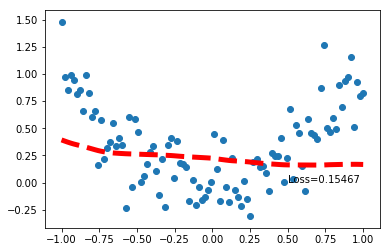

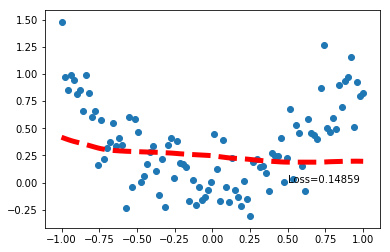

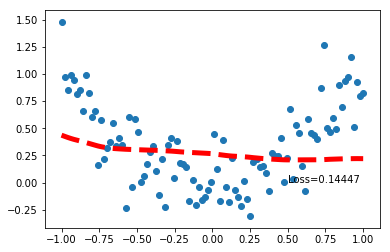

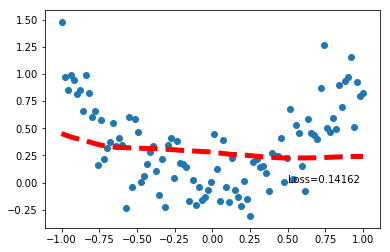

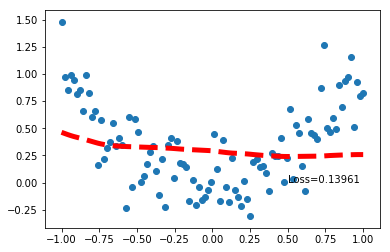

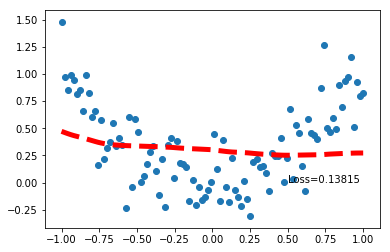

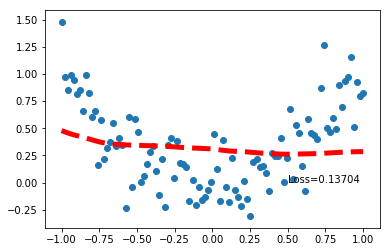

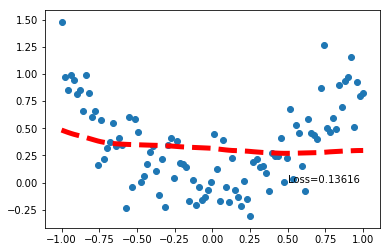

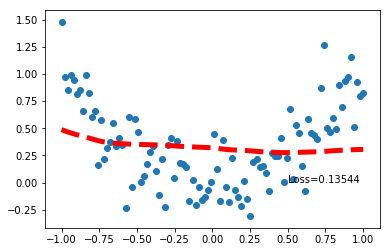

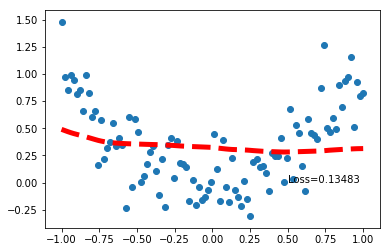

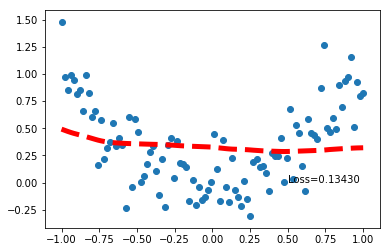

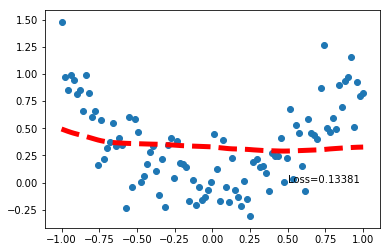

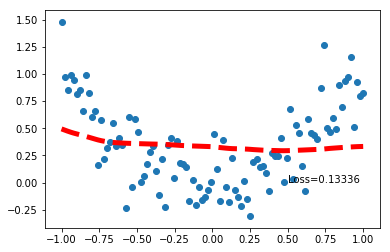

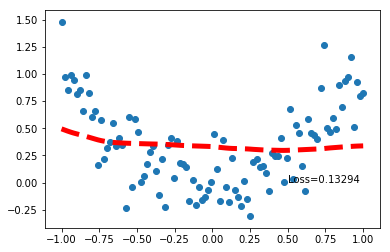

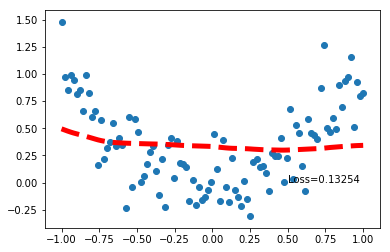

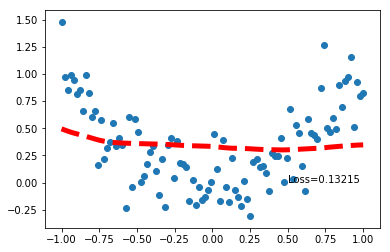

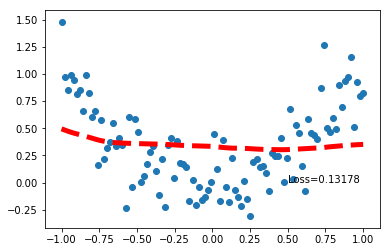

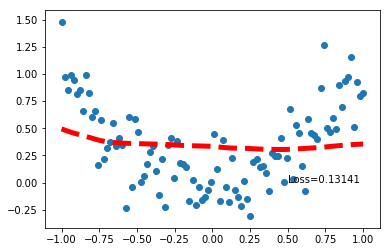

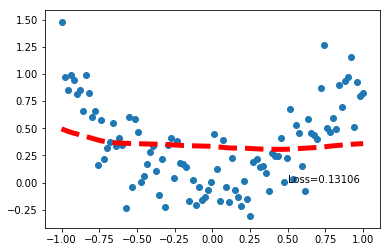

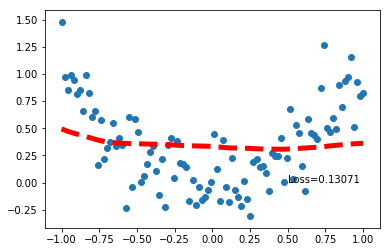

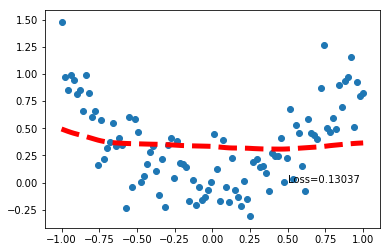

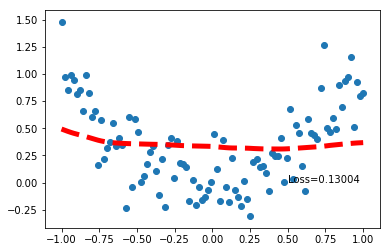

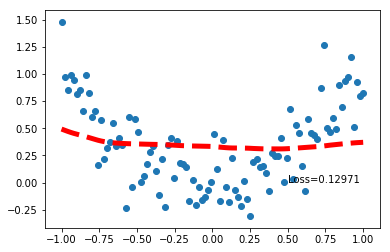

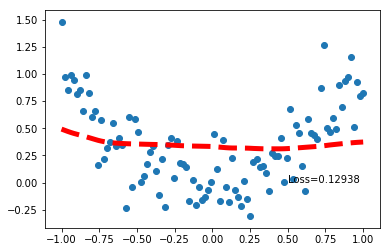

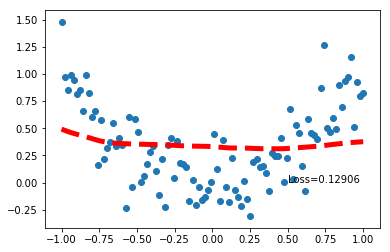

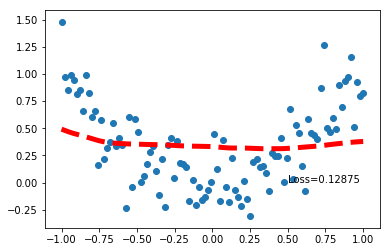

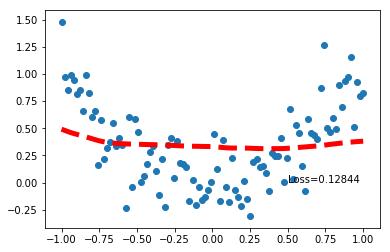

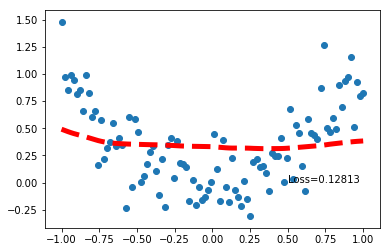

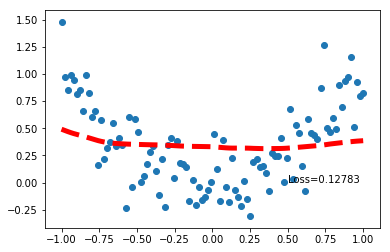

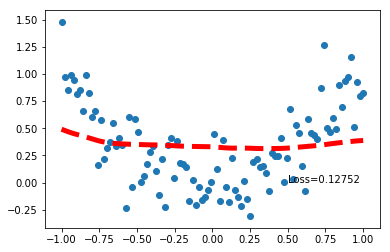

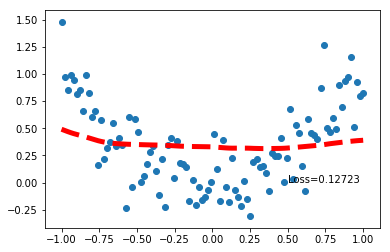

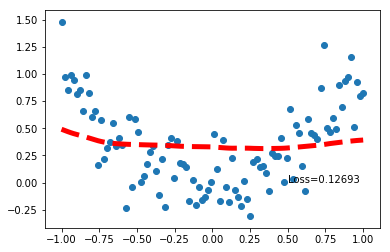

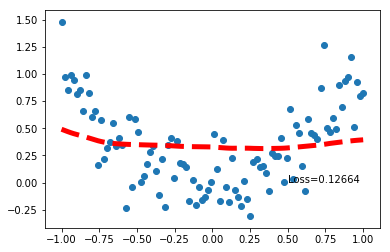

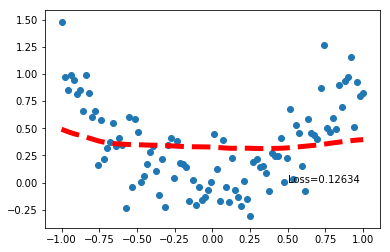

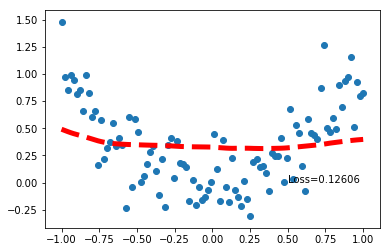

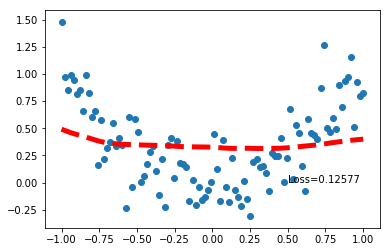

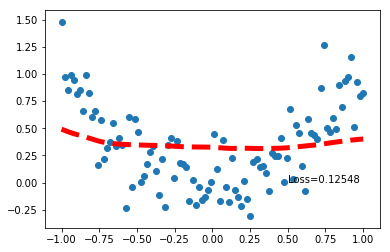

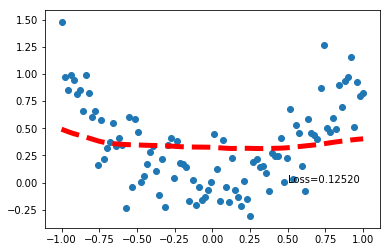

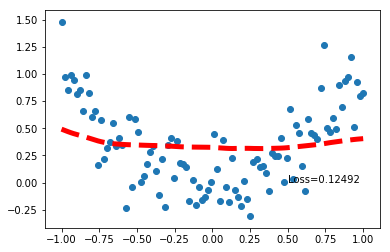

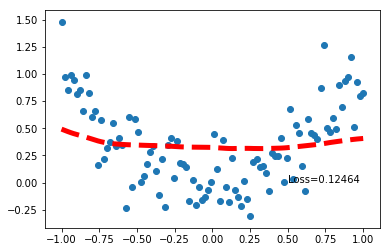

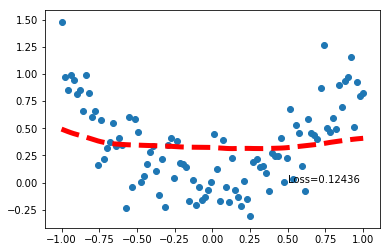

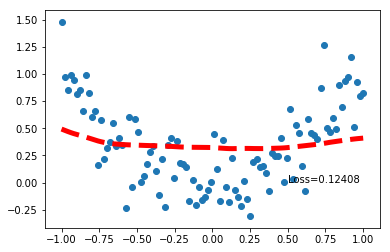

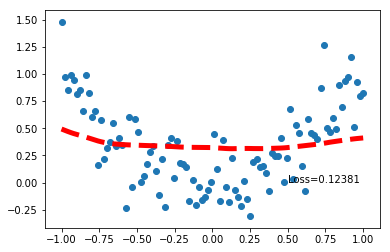

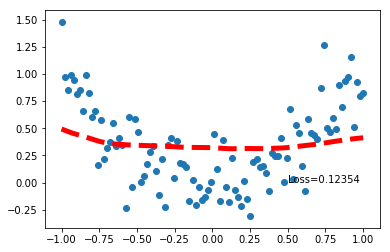

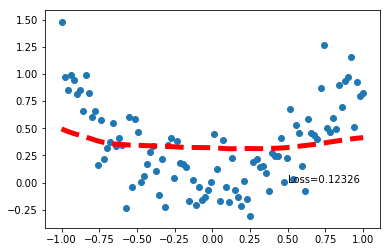

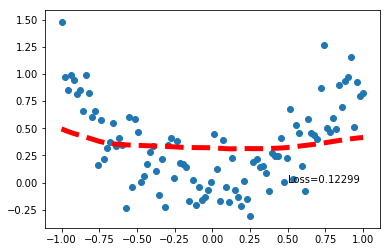

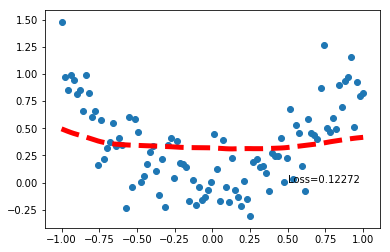

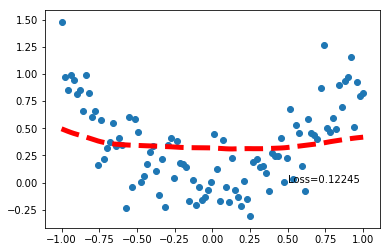

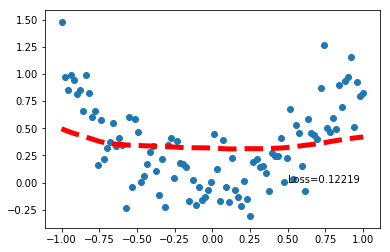

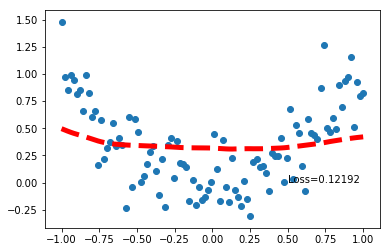

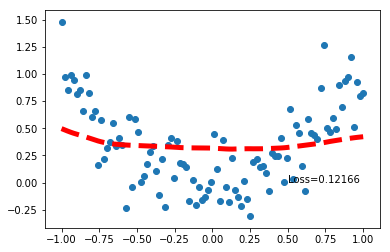

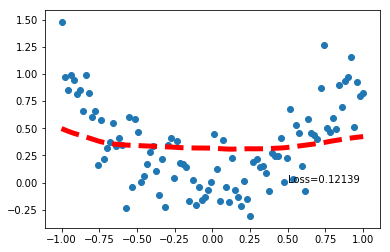

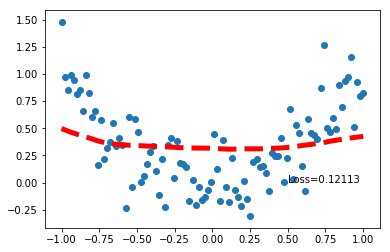

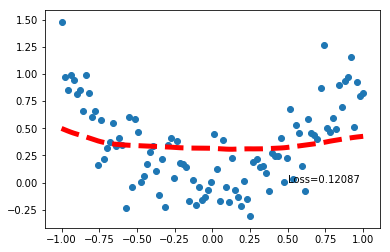

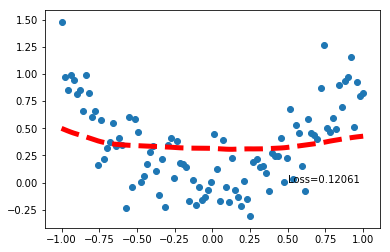

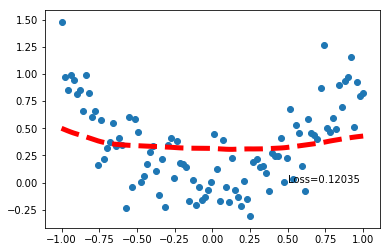

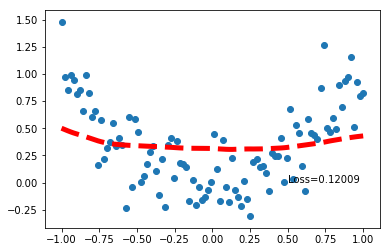

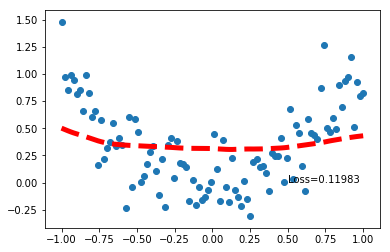

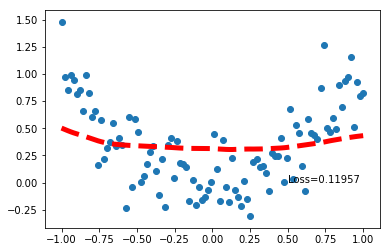

In [69]:
#开始训练
for t in range(300):
    prediction = net(x)
    
    
    loss = loss_fun(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t%5==0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())  #original graphic
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r--',lw=5)
        plt.text(0.5,0,'Loss=%.5f' % loss.data.numpy())
        plt.pause(0.1)      
plt.ioff()
plt.show()